<a href="https://colab.research.google.com/github/shauryanegi/tensorflow-deep-learning/blob/gh-pages/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problem.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [374]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [375]:
#Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [376]:
#Check out labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now...lets visualize it.

In [377]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1":X[:,1], "label":y})

In [378]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


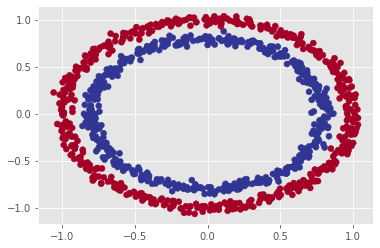

In [379]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu);

## Input and output shapes

In [380]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [381]:
# How many samples we're working
len(X),len(y)

(1000, 1000)

In [382]:
#X = tf.convert_to_tensor(X)
#y = tf.convert_to_tensor(y)

In [383]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [384]:
import tensorflow as tf
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#3. Fit the model
model_1.fit(X,y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240


In [385]:
# Let's try to improve our model by training for longer
model_1.fit(X,y,epochs = 200, verbose= 0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4910


[0.6931543350219727, 0.4909999966621399]

Since we're working on a binary classification and our model is getting less than 50% accuracy.
It is performing as it is guessing.

So let's step up a notch and add an extra layer.

In [386]:
# Set the random seed
tf.random.set_seed(42)

#1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile a model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#3. Fit the model
model_2.fit(X,y, epochs = 100, verbose = 0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7178 - accuracy: 0.4860


[0.7177660465240479, 0.4860000014305115]

## Improve our model

1. Create a model - we might add more layers or increase the number of hidden units in the layer.

2. Compiling a model - We might want to choose a different optimization function.

3. Fitting a model - More epochs (Leave it training longer)

## Let us try compiling our model with activation functions. Activation functions remove non-linearity in our model.

In [387]:
# Set the random seed
tf.random.set_seed(42)

#1. Build a model
model_3 = tf.keras.Sequential([
tf.keras.layers.Dense(100), # Add 100 dense neurons
tf.keras.layers.Dense(10),  # Add 10 dense neurons
tf.keras.layers.Dense(1)                                            
])

#2. Compile a model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['accuracy'])

#3. Fit the model
model_3.fit(X,y ,epochs = 100, verbose = 0)

In [388]:
model_3.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_139 (Dense)            (None, 10)                1010      
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 11        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [389]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934199929237366, 0.5]

To visualize our model's predictions, let's create a function.

This function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values 
* Make predictions along the meshgrid
* Plot predictions as well as line between zones (where each unique class falls)

In [390]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


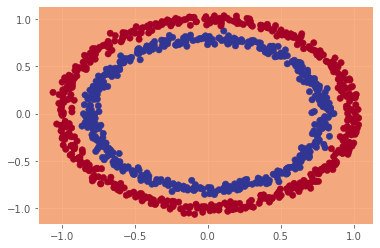

In [391]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3,
                       X = X,
                       y = y)

###The model will give its best result of 0.5 without any activation functions.
###Activation functions introduce non-linearity in Neural Nets and this is the most important thing in a Neural Net.
###Without activation functions, a Neural Net will just give a linear fit to the data.
###Simply put, an activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. When comparing with a neuron-based model that is in our brains, the activation function is at the end deciding what is to be fired to the next neuron.

## The missing piece: Non - linearity

In [392]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation= 'linear'), #Linear activation function will give linearity in our model.
                               tf.keras.layers.Dense(10, activation= 'linear'),
                               tf.keras.layers.Dense(1, activation = 'linear')
])

#2. Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['accuracy'])

#3. Fit the model
history = model_4.fit(X,y, epochs = 100, verbose = 0)

In [393]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934199929237366, 0.5]

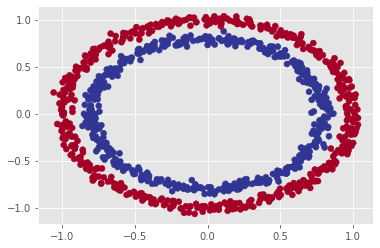

In [394]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c= y, cmap = plt.cm.RdYlBu);

doing binary classifcation...


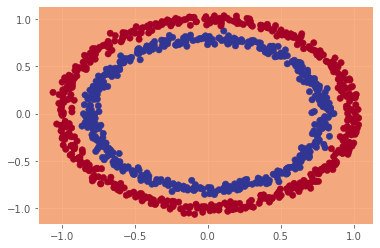

In [395]:
# Check the decision boundary of our latest model
plot_decision_boundary(model = model_4,
                       X = X,
                       y = y);

## Let us add a non-linear activation function. (ReLU)

In [396]:
# Set random seed
tf.random.set_seed(42)

# 1. Build a model with non-linear activation function
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation = 'relu')
])

#2. Compile a model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['accuracy'])

#3. Fit a model
history = model_5.fit(X,y,epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6463 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5734 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8241 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7819 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7589 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7423 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7305 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7206 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7136 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7080 - accuracy: 0.4920
Epoch 11/

In [397]:
#Evaluate the model
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4980


[0.6931816339492798, 0.49799999594688416]

## Time to use a more complex model for better results

In [398]:
# Set the random seed
tf.random.set_seed(42)

#1. Build a model
model_6 = tf.keras.Sequential([
                                      tf.keras.layers.Dense(8, activation= 'relu'),
                                      tf.keras.layers.Dense(4,activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')
])

#2. Compile a model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['accuracy'])

#3. Fit a model
history = model_6.fit(X,y, epochs = 100, verbose = 0)

In [399]:
#Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 9.4587e-04 - accuracy: 1.0000


[0.000945873383898288, 1.0]

doing binary classifcation...


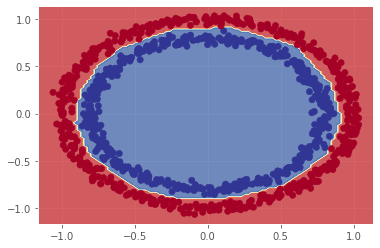

In [400]:
#Plotting the decision boundary
plot_decision_boundary(model_6,
                       X = X,
                       y = y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

🤔 Question: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

🔑 Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [401]:
#Create a toy tensor (similar to data)
A = tf.cast(tf.range(-10,10), dtype = tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

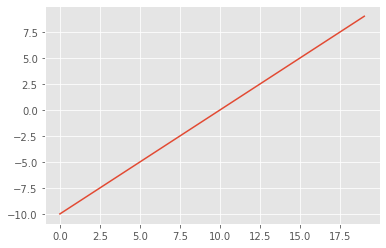

In [402]:
# Visualize our toy set
plt.plot(A);

In [403]:
#Create a sigmoid

def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use sigmoid function on toy tensor
sigmoid(A) 

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

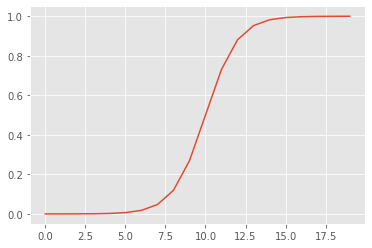

In [404]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [405]:
# Create a ReLU
def relu(x):
  return tf.maximum(0,x)

# Use ReLU function in our toy tensor.
relu(A) 

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

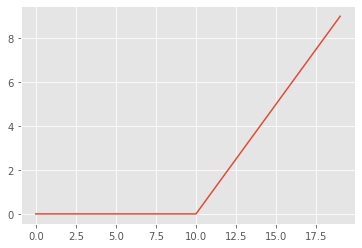

In [406]:
# Plot our toy tensor transfomred by ReLU
plt.plot(relu(A));

In [407]:
# Let us try the linear activation function
#Returns the input, unmodified.
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

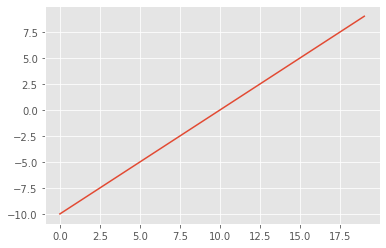

In [408]:
# Plot our linear activation function
plt.plot(tf.keras.activations.linear(A));

In [409]:
# Does A even change?
# It does not change at all
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset.

We cannot do this in ML.
Let us create a training and test set.

In [410]:
# Check number of examples
len(X)

1000

In [411]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [412]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [413]:
# Let's recerate a model to fit on the training data and evaluate on the testing data

# Set a random seed
tf.random.set_seed(42)

# 1. Build a model
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation= 'sigmoid')
])

# 2. Compile a model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ['accuracy'])

# 3. Fit a model
history = model_8.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6824 - accuracy: 0.5638
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6750 - accuracy: 0.5650
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6680 - accuracy: 0.5763
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6635 - accuracy: 0.5725
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.5713
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6475 - accuracy: 0.5938
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6312 - accuracy: 0.6275
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.6963
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5844 - accuracy: 0.7212
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7675
Epoch 11/

In [414]:
# Summary of the model
model_8.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (32, 4)                   12        
_________________________________________________________________
dense_149 (Dense)            (32, 4)                   20        
_________________________________________________________________
dense_150 (Dense)            (32, 1)                   5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [415]:
# Evaluating our model
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9800


[0.0536271370947361, 0.9800000190734863]

doing binary classifcation...
doing binary classifcation...


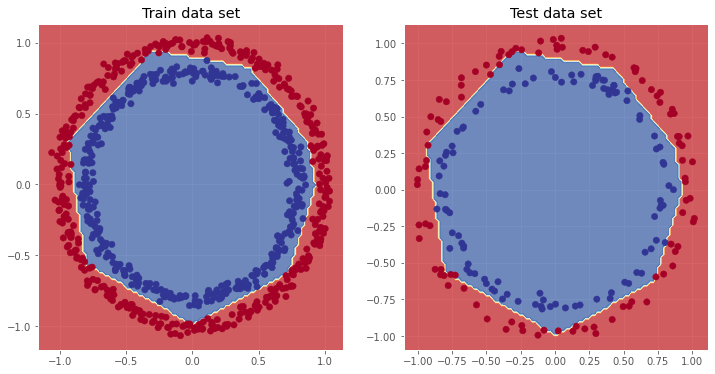

In [416]:
# Plot the decision boundary for the training and test data set
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train data set")
plot_decision_boundary(model_8, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test data set")
plot_decision_boundary(model_8, X=X_test, y =y_test)
plt.show();

In [417]:
model_8.summary()

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_149 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_150 (Dense)            (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


## Plot the loss (or training) curves

In [418]:
# Convert the history object into DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
...,...,...
95,0.019129,0.99625
96,0.017804,0.99875
97,0.016421,0.99375
98,0.016849,0.99500


Text(0.5, 1.0, 'Model_8 loss curves')

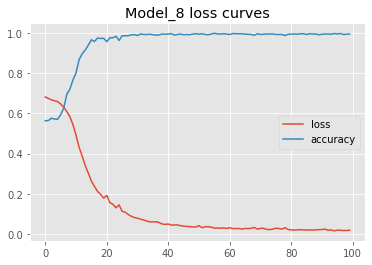

In [419]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")


Beautiful. This is the ideal plot we'd be looking for when dealing with a classification problem, loss going down, accuracy going up.

🔑 Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:

* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your model while it is training.
* Another model (we could use the same one as above but we are practicing building models)
* A modified loss curves plot.

In [420]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#2. Compile a model
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

#4. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6910 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.4975
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6897 - accuracy: 0.5075
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6888 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6873 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.5088
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5038
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5100
Epoch 11/

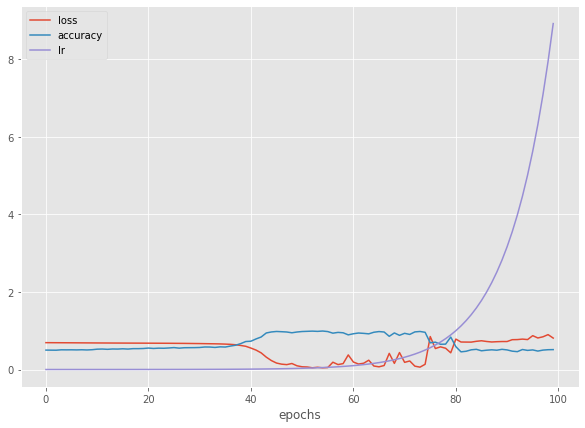

In [421]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize = (10,7), xlabel = 'epochs');

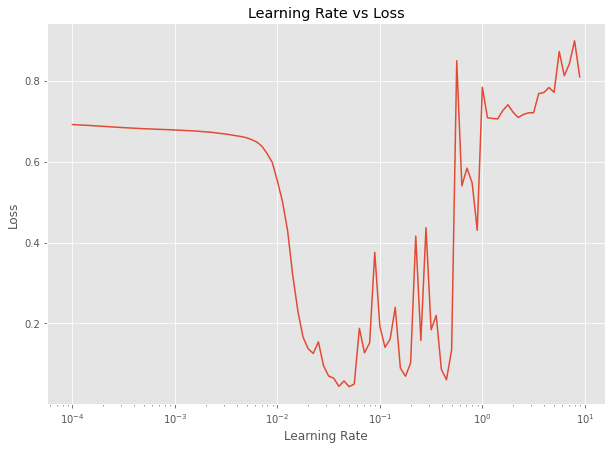

In [422]:
# Plot the leanring rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.plot();

In [423]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [424]:
# Our ideal learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# 1. Build a model
model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(units = 4, activation = 'relu'),
                                tf.keras.layers.Dense(units = 4, activation = 'relu'),
                                tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

#2. Compile a model
model_10.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005),
                 metrics = ['accuracy']) #Our ideal learning rate 


# 3. Fit a model
history_10 = model_10.fit(X_train,y_train, epochs = 75)

Epoch 1/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5400
Epoch 2/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6783 - accuracy: 0.5675
Epoch 3/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6749 - accuracy: 0.5562
Epoch 4/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.5625
Epoch 5/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.5575
Epoch 6/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5688
Epoch 7/75
25/25 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5825
Epoch 8/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.5913
Epoch 9/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.5875
Epoch 10/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6537 - accuracy: 0.5838
Epoch 11/75
25/25 [

In [425]:
# Evaluate model_10 on test set
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9700


[0.10455837845802307, 0.9700000286102295]

In [426]:
# Evaluate model 8 on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9800


[0.0536271370947361, 0.9800000190734863]

doing binary classifcation...
doing binary classifcation...


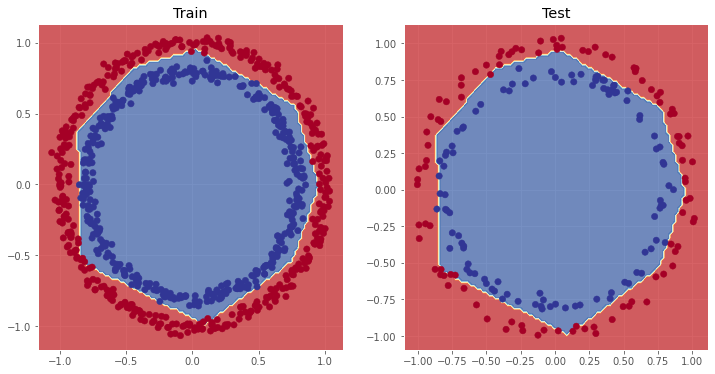

In [427]:
#Plot the decision boundaries for training and test data
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X = X_train, y = y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X = X_test, y= y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a ahdnful of other classification evaluation metrics, we should be familiar with.

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn)

In [428]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1046 - accuracy: 0.9700
Model loss on test set: 0.10455837845802307
Model accuracy on test set: 97.00%


## How about a confusion matrix?

In [429]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

#Create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[95,  5],
       [ 1, 99]])

In [430]:
y_test[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [431]:
y_preds[:10]

array([[0.99799955],
       [0.37575158],
       [0.9948179 ],
       [0.01073   ],
       [0.7488737 ],
       [0.8296554 ],
       [0.01906067],
       [0.00384581],
       [0.97141445],
       [0.18027791]], dtype=float32)

Looks like our predictions array has come out in prediction probability form. We have to convert our predictions into binary numbers.
The standard output from sigmoid/softmax activation functions.

In [432]:
# Convert predictions probability into binary format and view the first 10
#tf.round(y_preds)

## Prettify confusion matrix

## How about we prettify our confusion matrix?

## Note: The following confusion matrix code is a remix of Scikit-Learn's 
## plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
## and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

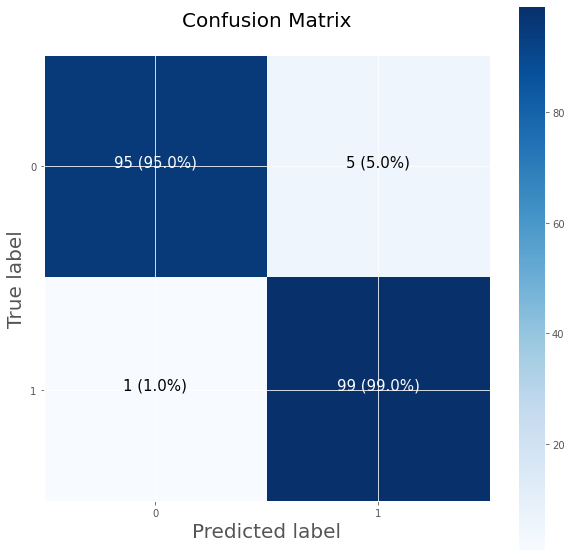

In [433]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)
We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

📖 Resource: The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [434]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into training and test sets for uus.
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [435]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: \n{test_data[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [436]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

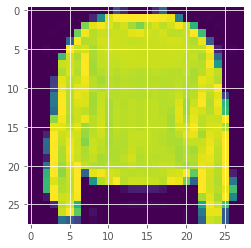

In [437]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [438]:
# Check samples
train_labels[7] # It is a pullover as checked in the labels

2

In [439]:
# Create a small list so we can index onto our training labels so that are human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

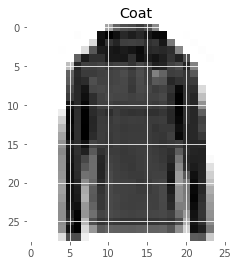

In [440]:
# Plot an example image and its label
index_of_choice = 24
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

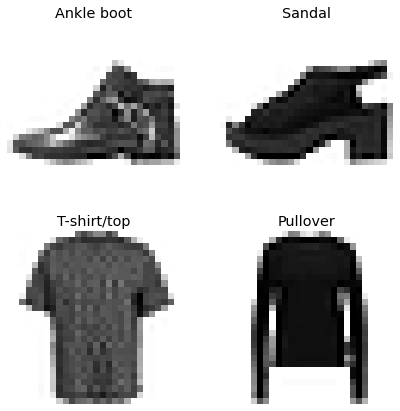

In [441]:
# Plot multiple random images of random MNIST
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

The input shape will have to deal with 28x28 tensors (the height and width of our images).

We're actually going to squash the input into a tensor (vector) of shape (784).

The output shape will have to be 10 because we need our model to predict for 10 different classes.

We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. 
As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.

We'll need to change our loss function from a binary loss function to a multiclass loss function.

More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), 

if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().

We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.
You ready? Let's go.

In [442]:
# Flatten our layer
# Our data needs to be flattened from (28*28) to 784

flatten_layer = tf.keras.Sequential([
                                     tf.keras.layers.Flatten(input_shape = (28,28))
])                                     
flatten_layer.output_shape

(None, 784)

In [443]:
28 * 28

784

In [444]:
tf.one_hot(train_labels[:10], depth = 10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [451]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [452]:
# Check the model summary
model_11.summary()

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_164 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_165 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [453]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer the data to be scaled so the gradient descent converges faster. This speeds up the algorithm.

Normalizing the data generally speeds up learning and leads to faster convergence.

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).

In [454]:
# Divide train and test images by the maximum value (normalize it)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [455]:
# Now our data is normalized, let us build our model.
# Set random seed

tf.random.set_seed(42)

# 1. Build a model

model_12 = tf.keras.Sequential([
                        tf.keras.layers.Flatten(input_shape=(28, 28)),
                        tf.keras.layers.Dense(units=4, activation='relu'
                        ), tf.keras.layers.Dense(units=4,
                        activation='relu'), tf.keras.layers.Dense(10,
                        activation='softmax')])  # Multi-class classification

# 2. Compile a model

model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])

# 3. Fit a model

norm_history = model_12.fit(train_data_norm, tf.one_hot(train_labels,
                            depth=10), epochs=10,
                            validation_data=(test_data_norm,
                            tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0987 - accuracy: 0.5718 - val_loss: 0.9617 - val_accuracy: 0.6553
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8661 - accuracy: 0.6932 - val_loss: 0.8452 - val_accuracy: 0.7093
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8399 - accuracy: 0.7001 - val_loss: 0.8149 - val_accuracy: 0.7089
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8276 - accuracy: 0.7054 - val_loss: 0.8251 - val_accuracy: 0.7037
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8201 - accuracy: 0.7060 - val_loss: 0.9053 - val_accuracy: 0.6706
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8157 - accuracy: 0.7085 - val_loss: 0.8032 - val_accuracy: 0.7090
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8051 - accuracy: 0.7094 - val_loss: 0.9451 - val_accuracy:

Woah, we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

Let's plot each model's history (their loss curves).

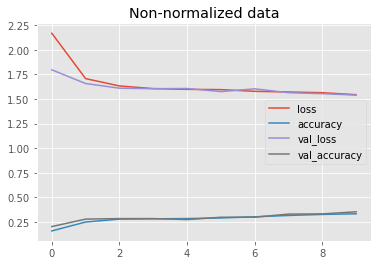

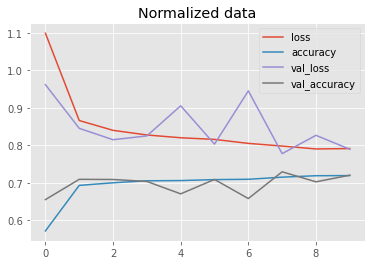

In [457]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title = 'Non-normalized data')

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title = 'Normalized data')

Wow. From these two plots, we can see how much quicker our model with the normalized data (model_12) improved than the model with the non-normalized data (model_11).

🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

## Finding the ideal learning rate

In [476]:
# Set random seed
tf.random.set_seed(42)

# 1. Build model

model_13 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(units = 4, activation = 'relu'),
                                tf.keras.layers.Dense(units = 4, activation = 'relu'),
                                tf.keras.layers.Dense(10, activation= 'softmax')
])

# 2. Compile our model

model_13.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# 3. Creating the learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

#4. Fit out model
find_lr_history = model_13.fit(train_data_norm, tf.one_hot(train_labels, depth = 10), 
                             epochs = 40, 
                             validation_data = (test_data_norm,
                             tf.one_hot(test_labels, depth = 10)),
                             callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

Text(0.5, 1.0, 'Finding the ideal learning rate')

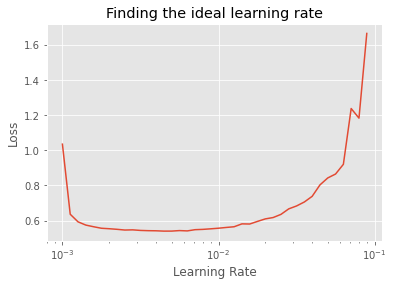

In [477]:
# Plotting to find the ideal learning rate
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10 **(tf.range(40)/20)) 
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

### The Ideal Learning rate is coming to be approx 0.008 to 0.01

In [498]:
# Let's refit the model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# 1. Build a model
model_14 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4, activation= 'relu'),
                                tf.keras.layers.Dense(4, activation= 'relu'),
                                tf.keras.layers.Dense(10, activation = 'softmax')

])

#2. Compile a model
model_14.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics = ['accuracy'])

#3. Fit a model

history_14 = model_14.fit(train_data_norm, tf.one_hot(train_labels, depth = 10), epochs = 30,
             validation_data = (test_data_norm, tf.one_hot(test_labels, depth = 10)))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0987 - accuracy: 0.5718 - val_loss: 0.9617 - val_accuracy: 0.6553
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8661 - accuracy: 0.6932 - val_loss: 0.8452 - val_accuracy: 0.7093
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8399 - accuracy: 0.7001 - val_loss: 0.8149 - val_accuracy: 0.7089
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8276 - accuracy: 0.7054 - val_loss: 0.8251 - val_accuracy: 0.7037
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8201 - accuracy: 0.7060 - val_loss: 0.9053 - val_accuracy: 0.6706
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8157 - accuracy: 0.7085 - val_loss: 0.8032 - val_accuracy: 0.7090
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8051 - accuracy: 0.7094 - val_loss: 0.9451 - val_accuracy:

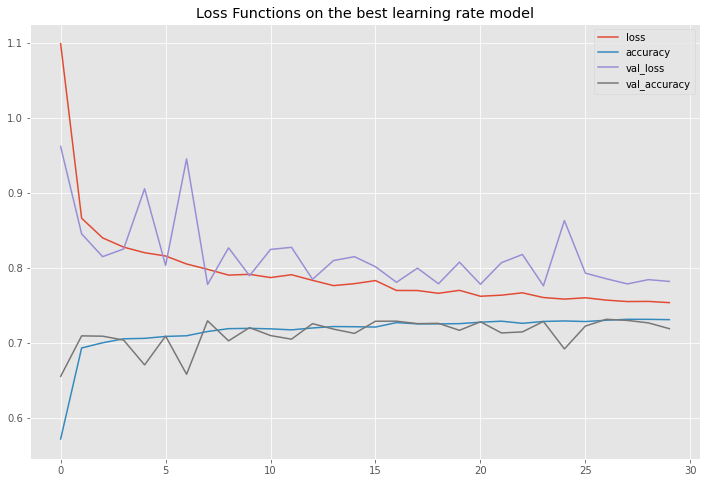

In [499]:
#Plot model curves

pd.DataFrame(history_14.history).plot(title = "Loss Functions on the best learning rate model", figsize = (12,8));

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
Assess some of its predictions (through visualizations).
Improve its accuracy (by training it for longer or changing the architecture).
Save and export it for use in an application.
Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [500]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [507]:
# Make predictions with the latest model
y_probs = model_14.predict(test_data_norm) #probs is short for prediction probabilities

# View the first 5 predictions
y_probs[:5]

array([[5.0116600e-10, 4.7330343e-16, 3.5933867e-10, 4.3339279e-15,
        5.1731119e-11, 7.0000172e-02, 3.5728701e-10, 5.2172653e-02,
        2.2600025e-05, 8.7780458e-01],
       [3.4515971e-05, 3.5170904e-16, 9.6997064e-01, 2.9148982e-08,
        2.4885178e-02, 1.0124161e-12, 5.0201723e-03, 7.4921582e-29,
        8.9453883e-05, 2.3840905e-15],
       [2.6800934e-02, 9.6235436e-01, 3.2886095e-05, 1.0538685e-02,
        7.1327449e-06, 4.7594755e-09, 2.5302192e-04, 7.9224236e-09,
        1.2983880e-05, 4.9811341e-14],
       [2.6800934e-02, 9.6235436e-01, 3.2886095e-05, 1.0538685e-02,
        7.1327449e-06, 4.7594755e-09, 2.5302192e-04, 7.9224236e-09,
        1.2983880e-05, 4.9811341e-14],
       [6.7385800e-02, 7.3974377e-07, 5.1304960e-01, 3.8141354e-03,
        1.3521713e-01, 8.3010054e-05, 2.7414623e-01, 3.4962352e-11,
        6.3033910e-03, 3.5076088e-08]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [512]:
# Convert all of the prediction probabilites into integers
y_probs[0], class_names[tf.argmax(y_probs[0])]

(array([5.0116600e-10, 4.7330343e-16, 3.5933867e-10, 4.3339279e-15,
        5.1731119e-11, 7.0000172e-02, 3.5728701e-10, 5.2172653e-02,
        2.2600025e-05, 8.7780458e-01], dtype=float32), 'Ankle boot')

### Note: Remember to make predictions on the same kind of data your model was trained on(eg: if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [513]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis = 1)

#View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 4, 2, 5, 7])

In [514]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [518]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[718,  15,  30, 155,   1,   5,  55,   0,  21,   0],
       [ 17, 924,   3,  45,   0,   0,   9,   0,   2,   0],
       [ 44,   0, 748,  27,  87,   8,  82,   0,   4,   0],
       [ 35,  32,   6, 837,   5,   2,  67,   2,  14,   0],
       [  5,   0, 408,  98, 311,  28, 141,   0,   9,   0],
       [  0,   0,   2,   0,   6, 759,   9,  87,  19, 118],
       [162,   6, 299, 129, 155,  16, 201,   1,  31,   0],
       [  0,   0,   0,   0,   0,  24,   0, 884,  10,  82],
       [  5,   1,   2,  35,   9,  33,  10,  32, 873,   0],
       [  0,   0,   1,   0,   0,  20,   0,  43,   2, 934]])

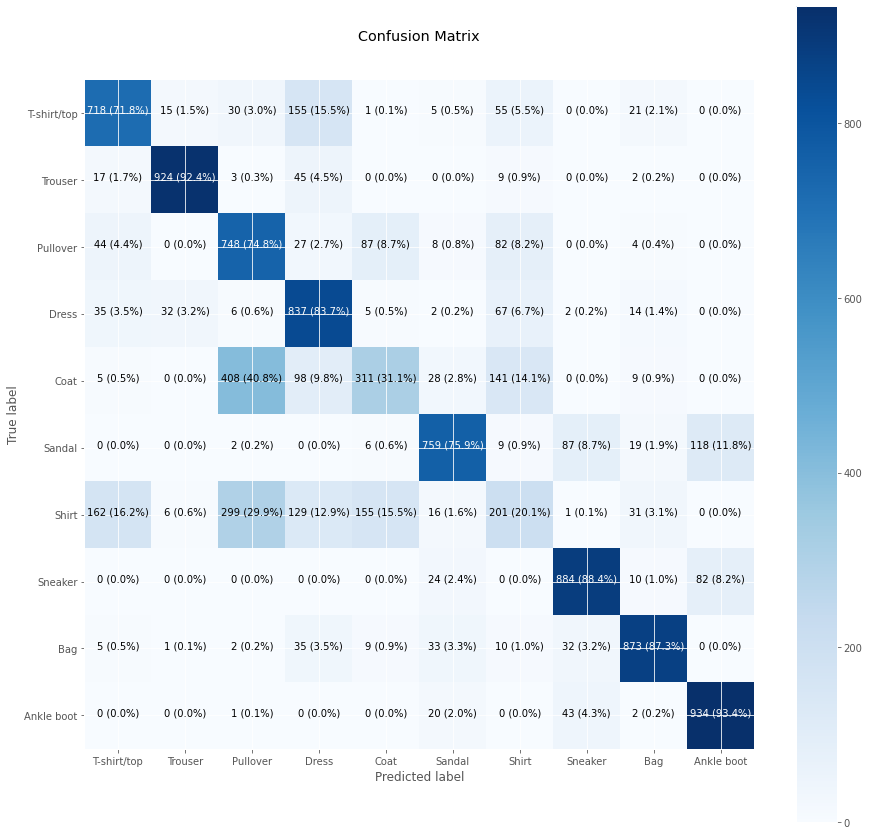

In [519]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

🤔 Question: Does it make sense that our model is getting confused between the Shirt and T-shirt/top classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

🔑 Note: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [520]:
import random

def plot_random_image(model, images, true_labels, classes):
  """

  Picks a random image, plots it and labels it with a prediction and truth label

  """

  # Set up random integer
  i = random.randint(0,len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]


  # Plot the image
  plt.imshow(target_image, cmap = plt.cm.binary)

  #Change the color of the titles depending on if the prediction is right or wrong.

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

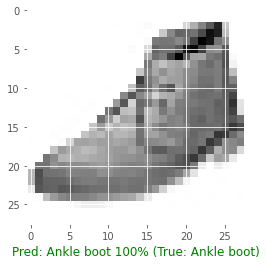

In [524]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

## What patterns is our model learning?

In [525]:
# Find the layers of our most recent model
model_14.layers

In [526]:
# Extract a particular layer
model_14.layers[1]

In [527]:
# Get the patterns of a layer in our network
weights,biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 2.87192017e-02, -3.73585200e+00, -3.14167708e-01,
         -6.19846582e-03],
        [-8.13850760e-02,  1.24902058e+01, -1.85424042e+00,
          6.49986118e-02],
        [-4.77612279e-02,  6.09208059e+00, -1.06605234e+01,
          3.88018042e-02],
        ...,
        [ 1.55686066e-02,  8.87916982e-01, -1.24194704e-01,
         -2.34896317e-02],
        [ 1.09504163e-02,  3.83493161e+00,  2.44095159e+00,
         -7.46114552e-02],
        [-4.82979417e-03,  4.59156132e+00, -4.41214752e+00,
         -5.81232756e-02]], dtype=float32), (784, 4))

In [528]:
model_14.summary()

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_193 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_194 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_195 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check out the bias vector.

In [529]:
# Bias and biases shapes
biases, biases.shape

(array([-0.0600306 , 11.222293  , 17.267174  , -0.06005089], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with the weights matrix. The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).
The bias vector dictates how much the oatterns within the corresponding weights should influence the next layer.

In [530]:
model_14.summary()

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_193 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_194 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_195 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


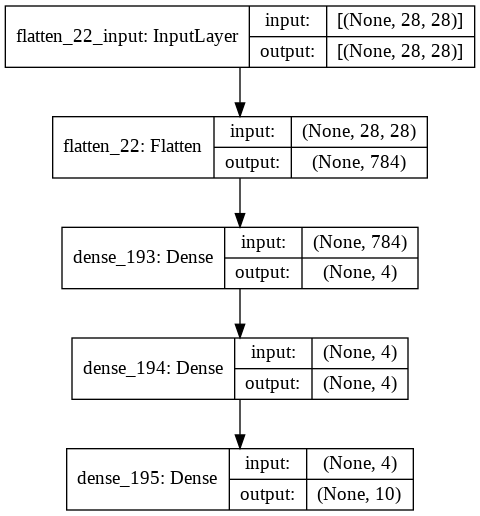

In [531]:
# Let us view our DL model
from tensorflow.keras.utils import plot_model
#See the inputs amd outputs of each layer

plot_model(model_14, show_shapes = True)